# Yulu Bike Demand Analysis: Exploratory Data Analysis (EDA)

## Overview

Yulu is India's leading micro-mobility service provider, offering unique electric vehicles for daily commutes. With a mission to eliminate traffic congestion, Yulu provides a safe and user-friendly commuting solution through a mobile app, enabling shared, solo, and sustainable commuting. Yulu zones are strategically located across metro stations, bus stands, office spaces, residential areas, and corporate offices to ensure smooth, affordable, and convenient first and last-mile connectivity.

### Project Objective

Yulu has experienced a significant dip in its revenues and wants to understand the factors influencing the demand for shared electric cycles in the Indian market. The primary objectives of this analysis are:

- To identify significant variables that predict the demand for shared electric cycles.
- To evaluate how well these variables describe the demand for electric cycles.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy.stats import binom,norm,ttest_ind,f_oneway,chi2_contingency,boxcox,kstest,shapiro,kruskal

In [7]:
df=pd.read_csv('yulu.csv')

In [8]:
df.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


## Data description

**datetime**: datetime

**season**: season (1: spring, 2: summer, 3: fall, 4: winter)


**holiday**: whether day is a holiday or not


**workingday**: if day is neither weekend nor holiday is 1, otherwise is 0.


**weather**:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


**temp**: temperature in Celsius

**atemp**: feeling temperature in Celsius


**humidity**: humidity

**windspeed**: wind speed

**casual**: count of casual users

**registered**: count of registered users **bold text**

**count**: count of total rental bikes including both casual and registered



In [9]:
df.info() #Checking for data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
df.isna().sum() #checking for null values

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


##Basic data exploration

In [11]:
df['season'].unique()

array([1, 2, 3, 4])

In [12]:
df['datetime']=pd.to_datetime(df['datetime'])

In [13]:
(pd.to_datetime(df['datetime']).min(),pd.to_datetime(df['datetime']).max()) # Getting max and min datetime stamp

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

[Text(0, 0, '2686'),
 Text(0, 0, '2733'),
 Text(0, 0, '2733'),
 Text(0, 0, '2734')]

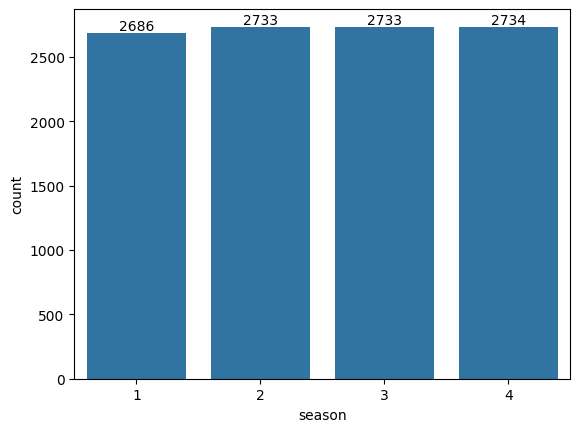

In [14]:
ax=sns.barplot(data=df['season'].value_counts()) # countplot for season
ax.bar_label(ax.containers[0])

In [15]:
df['holiday'].unique()

array([0, 1])

[Text(0, 0, '10575'), Text(0, 0, '311')]

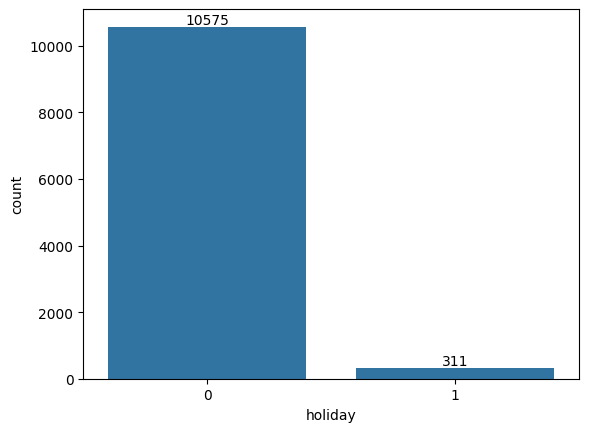

In [16]:
ax=sns.barplot(data=df['holiday'].value_counts()) # countplot for holiday
ax.bar_label(ax.containers[0])

In [17]:
df['workingday'].unique()

array([0, 1])

[Text(0, 0, '3474'), Text(0, 0, '7412')]

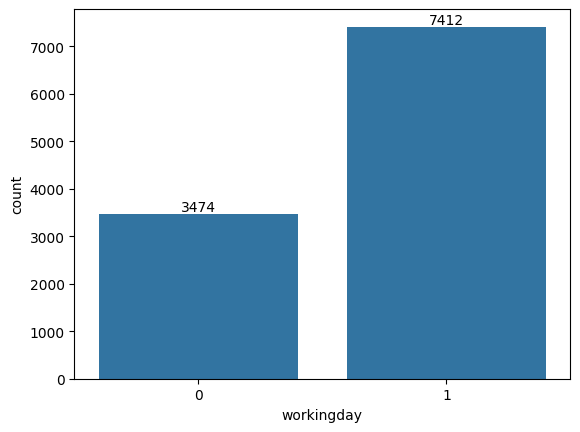

In [18]:
ax=sns.barplot(data=df['workingday'].value_counts())# countplot for workingday
ax.bar_label(ax.containers[0])

In [19]:
df['weather'].unique()

array([1, 2, 3, 4])

[Text(0, 0, '7192'), Text(0, 0, '2834'), Text(0, 0, '859'), Text(0, 0, '1')]

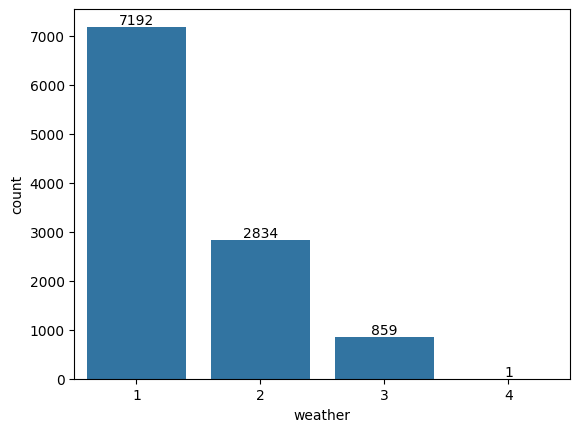

In [20]:
ax=sns.barplot(data=df['weather'].value_counts()) # countplot for weather
ax.bar_label(ax.containers[0])

<Axes: ylabel='windspeed'>

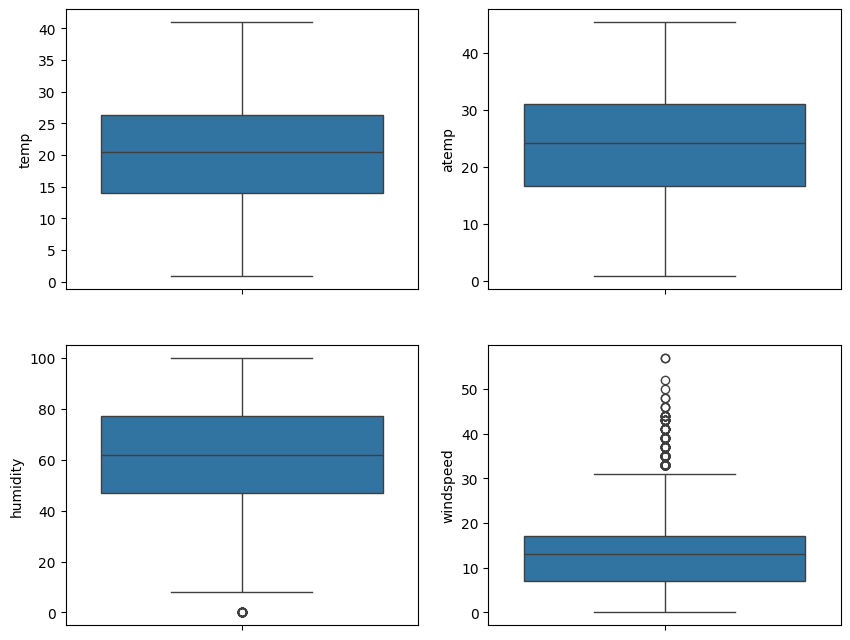

In [21]:
#Outlier detection
fig,ax=plt.subplots(2,2,figsize=(10,8))
sns.boxplot(ax=ax[0][0],data=df['temp'])
sns.boxplot(ax=ax[0][1],data=df['atemp'])
sns.boxplot(ax=ax[1][0],data=df['humidity'])
sns.boxplot(ax=ax[1][1],data=df['windspeed'])

In [22]:
#creating a new hour column
df['time']=df['datetime'].dt.hour

<Axes: xlabel='time', ylabel='count'>

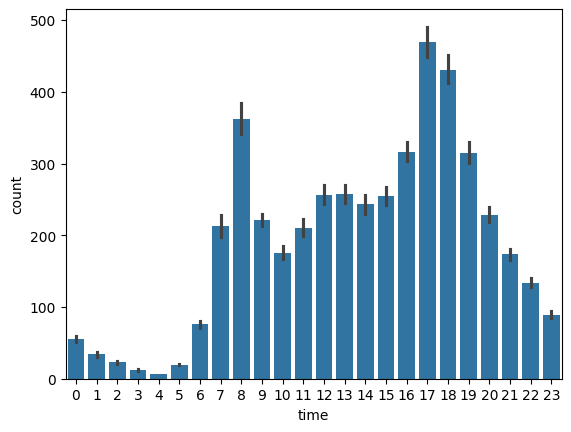

In [23]:
#Bar plot of count vs hour
sns.barplot(data=df,x='time',y='count')

<Axes: xlabel='time', ylabel='casual'>

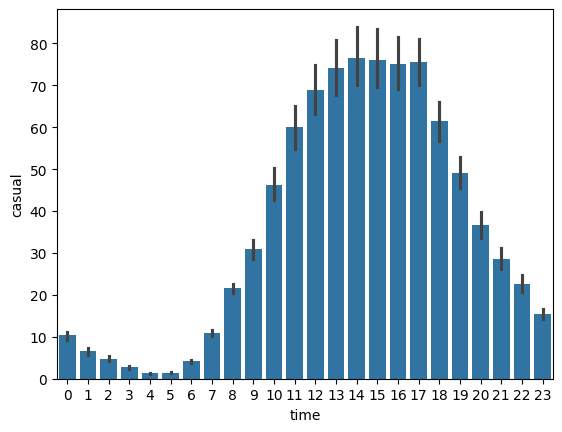

In [24]:
#Bar plot of count vs casual
sns.barplot(data=df,x='time',y='casual')

<Axes: xlabel='time', ylabel='registered'>

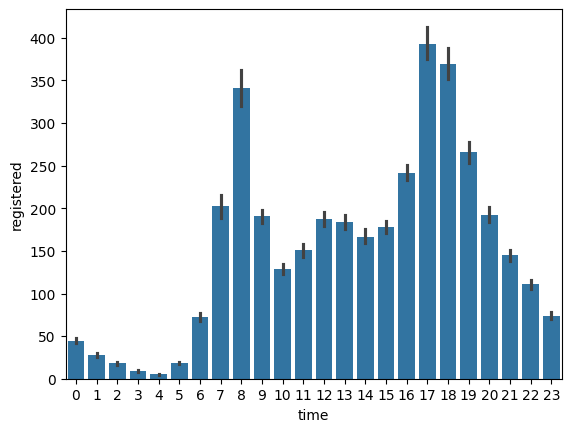

In [25]:
#Bar plot of count vs registered
sns.barplot(data=df,x='time',y='registered')

#Two sample T test for working day and count

In [26]:
#Preparing data
workingday=df.loc[df['workingday']==1,'count']
nonworkingday=df.loc[df['workingday']==0,'count']
np.mean(workingday),np.mean(nonworkingday)

(193.01187263896384, 188.50662061024755)

<Axes: xlabel='workingday', ylabel='count'>

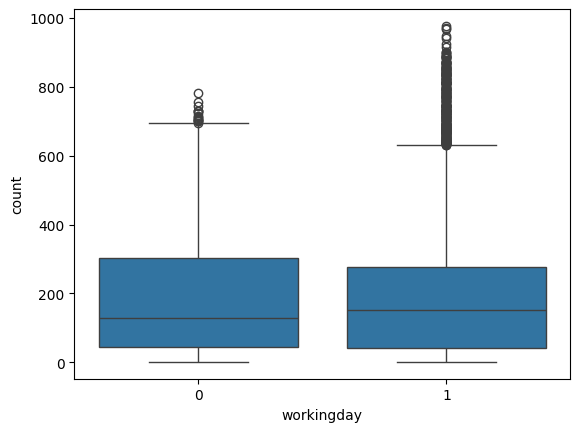

In [27]:
sns.boxplot(data=df,x='workingday',y='count')

<ipython-input-28-b6616471801e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(workingday.sample(3400),ax=ax[0])
<ipython-input-28-b6616471801e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nonworkingday.sample(3400),ax=ax[1])


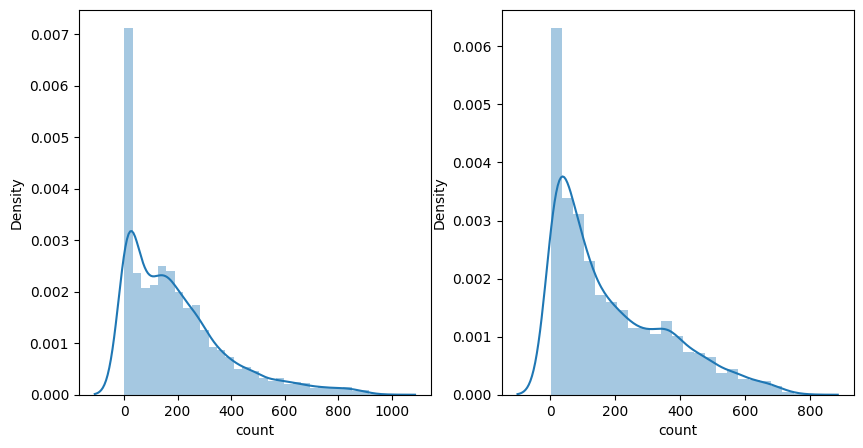

In [28]:
#Distribution of workingday and nonworkingday
workingday=workingday.sample(3400)#Taking a sample of 3400 (equal size for working and non working day)
nonworkingday=nonworkingday.sample(3400)
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.distplot(workingday.sample(3400),ax=ax[0])
sns.distplot(nonworkingday.sample(3400),ax=ax[1])
plt.show()

Null Hypothesis, H0: The distribution of workingday and nonworkingday is same

  Alternate hypothesis Ha: The distribution of workingday and nonworkingday are different

In [29]:
s,p_value=ttest_ind(workingday,nonworkingday)
a=0.05
print(p_value)
if p_value<a:
  print('Reject the null hypothesis')
else:
  print('Fail to reject null hypothesis')

0.06749023222186311
Fail to reject null hypothesis


The p-value for 2 sample t-test is greater than 0.05 suggesting we fail to reject the null
hypothesis thus there is no significant difference between mean value of count for working
and no working day.

**Inference**: Even during non-working days the ride counts are similar. Suggesting to keep the
bikes operation same even during non-working days

##Hypothesis testing for weather and count

<Axes: xlabel='weather', ylabel='count'>

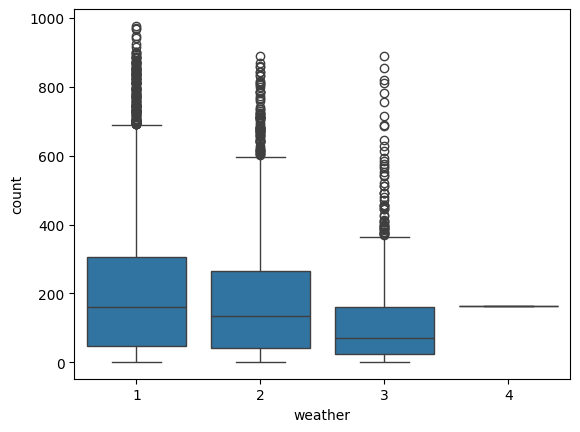

In [30]:
sns.boxplot(data=df,x='weather',y='count')

In [31]:
#collecting weather data seperately
clear=df.loc[df['weather']==1,'count']
mist=df.loc[df['weather']==2,'count']
light_rain=df.loc[df['weather']==3,'count']
#neglecting heavy rain,since it has only 1 disctribution

In [32]:
#calculating mean for these three weather conditions
np.mean(clear),np.mean(mist),np.mean(light_rain)

(205.23679087875416, 178.95553987297106, 118.84633294528521)

In [33]:
len(clear),len(mist),len(light_rain)

(7192, 2834, 859)

In [34]:
clear=clear.sample(859)
mist=mist.sample(859)
light_rain=light_rain.sample(859)

<ipython-input-35-63abcdd6c55d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clear,ax=ax[0])
<ipython-input-35-63abcdd6c55d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mist,ax=ax[1])
<ipython-input-35-63abcdd6c55d>:5: UserWarning: 

`distplot` is a deprecated function and will be remov

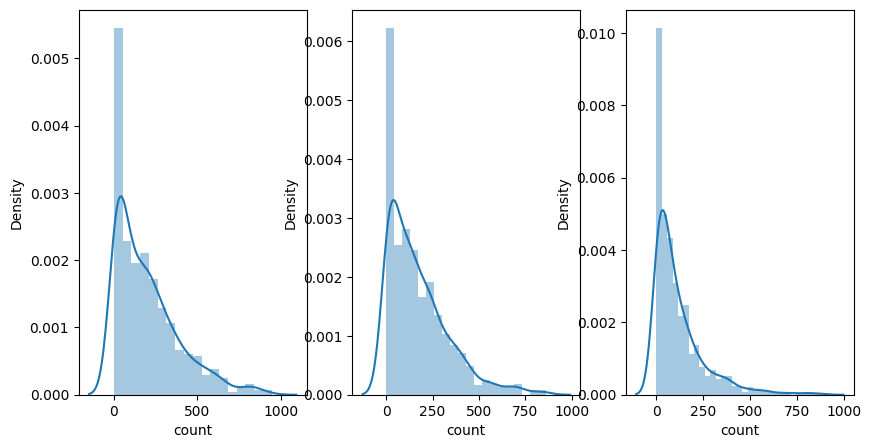

In [35]:
#distribution
fig,ax=plt.subplots(1,3,figsize=(10,5))
sns.distplot(clear,ax=ax[0])
sns.distplot(mist,ax=ax[1])
sns.distplot(light_rain,ax=ax[2])
plt.show()

In [36]:
s,p_value=shapiro(clear)
if p_value<0.05:
  print('clear data is not normally distributed')
else:
  print('clear data is normally distributed')

s,p_value=shapiro(mist)
if p_value<0.05:
  print('mist data is not normally distributed')
else:
  print('mist data is normally distributed')

s,p_value=shapiro(light_rain)
if p_value<0.05:
  print('light rain data is not normally distributed')
else:
  print('light rain data is normally distributed')

clear data is not normally distributed
mist data is not normally distributed
light rain data is not normally distributed


Since first assumption of ANOVA i.e. normal distribution is not met, we will go for Kruskal
Wallis test

**Null hypothesis H0**: Mean ride counts for clear, mist and light rain weather is same.

**Alternate hypothesis Ha**: Mean ride counts for clear, mist and light rain weather is different

In [37]:
s,p_value=kruskal(clear,mist,light_rain)
a=0.05
print(p_value)
if p_value<a:
  print('Reject the null hypothesis')
else:
  print('Fail to reject null hypothesis')

4.7133390722855294e-23
Reject the null hypothesis


For a 95% confidence interval, the P value is less than 0.05. Thus we can reject null
hypothesis and say that at least one weather condition has mean ride counts different
from the others.

In [38]:
#lets check for clear and mist weather using 2 sample t test
# Null Hypothesis, H0: The means for clear and mist ride counts are same
# Alternate hypothesis Ha: The means for clear and mist ride counts are different
s,p_value=ttest_ind(clear,mist)
a=0.05
print(p_value)
if p_value<a:
  print('Reject the null hypothesis')
else:
  print('Fail to reject null hypothesis')

0.0021559940157491716
Reject the null hypothesis


For a 95% confidence interval, the P value is less than 0.05. Thus we can reject null
hypothesis and say that clear and mist weather have different mean ride counts. Thus the
mean ride counts increases for light rain, mist and clear weather respectively.
  

In [39]:
#Chi squared test for dependecy.
weather_season=pd.crosstab(index=df['weather'],columns=df['season'])
weather_season      #Contigency table between weather and season

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


Null Hypothesis H0: Season doesnot impact weather

Alternate Hypothesis Ha: Season impacts weather

In [40]:
chi_stat, p_value, dof, exp_freq=chi2_contingency(weather_season)
alpha=0.05
print(p_value)
if p_value<alpha:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

1.5499250736864862e-07
Reject the null hypothesis


#Correlation between count and humidity

<Axes: >

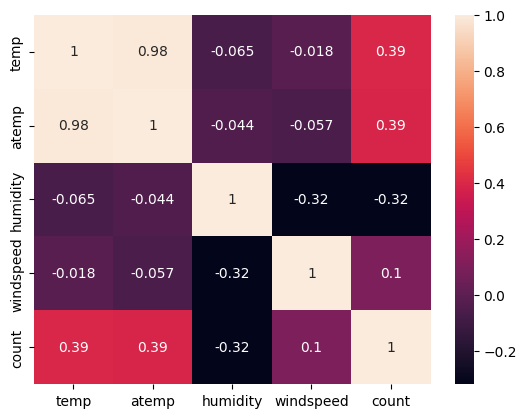

In [42]:

sns.heatmap(df[['temp',	'atemp','humidity',	'windspeed','count']].corr(),annot=True)

Observation: The heat map shows the following:
 There is weak positive correlation between temp, atemp and count. There might be
some positive impact on ride counts as temperature increases.
 There is weak negative correlation between humidity and count. There ride counts
might weakly decreases as humidity increase.
 There is almost no correlation between windspeed and count. Windspeed has no
impact on ride counts.
  

## Conclusion

Based on the EDA:

- **Weather conditions** play a significant role in determining ride counts, with clear skies and misty weather conditions leading to higher demand.
- **Seasonal changes** affect weather patterns, indirectly impacting ride counts.
- **Operational Recommendations:**

Consider adjusting the number of bikes and operational costs during rainy or
snowy seasons to optimize resource allocation.

keep the bikes operation same even during non-working days


